In [1]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from __future__ import print_function
X=pd.read_csv("C:/Users/DEEPANSH/Desktop/Tweets1.csv")

In [2]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
X

,Tweets,Labels
0,causing heavy traffic jams every day . All ou...,1
1,Look At This Pathetic Traffic Condition In Ar...,1
2,nTwo trucks collide on Eastern Express highwa...,1
3,nTwo trucks collide on Eastern Express highwa...,1
4,nTwo trucks collide on Eastern Express highwa...,1
5,the DG Systems has mandated this only as a PI...,0
6,! New date for jam session May . Explore how t...,0
7,. cars parked in no parking causing traffic ja...,1
8,. cars parked in no parking causing traffic ja...,1
9,. got ice cream trucks to drive around the cit...,0


In [3]:
X
x=X.Tweets
y=X.Labels
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=1)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(904,)
(302,)
(904,)
(302,)


D:\anaconda\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [10]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer()
vect.fit(X_train)
X_train_dtm = vect.transform(X_train)
X_train_dtm = vect.fit_transform(X_train)
X_test_dtm = vect.transform(X_test)
X_test_dtm
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_train_dtm, y_train)
y_pred_class8 = nb.predict(X_test_dtm)
y_pred_class1 = nb.predict(X_train_dtm)
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred_class))
#print(metrics.accuracy_score(y_train, y_pred_class1))
print(metrics.confusion_matrix(y_test, y_pred_class8))

0.8211920529801324
[[104  46]
 [ 10 142]]


In [12]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train_dtm, y_train)
y_pred_class = logreg.predict(X_test_dtm)
#y_pred_class1 = logreg.predict(X_train_dtm)
print(metrics.accuracy_score(y_test, y_pred_class))
#print(metrics.accuracy_score(y_train, y_pred_class1))
print(metrics.confusion_matrix(y_test, y_pred_class))

0.8211920529801324
[[126  24]
 [ 30 122]]


In [6]:
from sklearn.linear_model import SGDClassifier
X_train_counts = vect.fit_transform(X_train)
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer
text_clf_svm = Pipeline([('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                         ('clf-svm', SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, n_iter=5, random_state=42))])

text_clf_svm = text_clf_svm.fit(X_train, y_train)
predicted_svm = text_clf_svm.predict(X_test)
predicted_svm1 = text_clf_svm.predict(X_train)
import numpy as np
print(np.mean(predicted_svm == y_test))
#print(np.mean(predicted_svm1 == y_train))
print(metrics.confusion_matrix(y_test, predicted_svm))

0.8377483443708609
[[123  27]
 [ 22 130]]


D:\anaconda\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


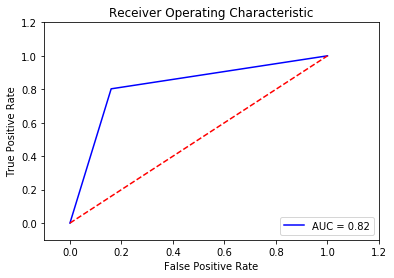

In [13]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_class)
roc_auc = auc(false_positive_rate, true_positive_rate)
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

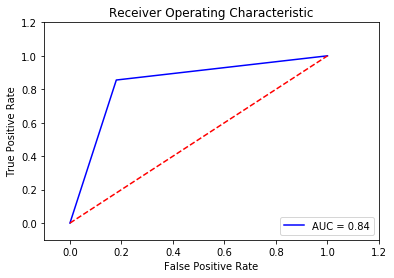

In [9]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, predicted_svm)
roc_auc = auc(false_positive_rate, true_positive_rate)
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

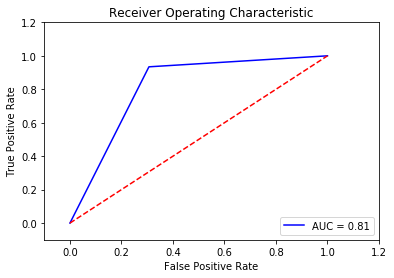

In [11]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_class8)
roc_auc = auc(false_positive_rate, true_positive_rate)
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()